Mô tả dữ liệu

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
df = pd.read_csv('dulieuxettuyendaihoc.csv',header=0,delimiter=',',encoding='utf-8')
df.head(3)

,MSSV,GT,DT,KV,M1,M2,M3,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,F,NaN,2NT,3.25,3.25,4.5,A1,12/7/2018,No
1,SV002,M,NaN,1,6.00,4.00,3.5,C,12/7/2018,Yes
2,SV003,M,NaN,1,5.00,6.75,4.0,C,12/7/2018,No


In [6]:
df[['M1']].head(4)

,M1
0,3.25
1,6.00
2,5.00
3,4.25


In [7]:
df[['KT']].head(4)

,KT
0,A1
1,C
2,C
3,D1


In [16]:
# print(f'{df["M1"].min()}\n{df["M1"].max()}\n')
# print(f'{df["M1"].mean()}\n{df["M1"].median()}\n')
# print(f'{df["KT"].mode()}\n')
# print(f'{df["M1"].quantile(0.25)}\n')'
print('Khảo sát cột M1 và KT')
print('Min M1:',df['M1'].min())
print('Max M1:',df['M1'].max())
print('Trung bình M1:',df['M1'].mean())
print('Trung vị M1:',df['M1'].median())
print('Yếu vị KT:',df['KT'].mode())
print('Chia M1 thành 1/4, phân vị đầu tiên là:',df["M1"].quantile(0.25))
print('Khoảng M1 là:',df['M1'].max() - df['M1'].min())
# df['M1'].quantile(0.75) - df['M1'].quantile(0.25)
print('Chia M1 thành 1/4, hiệu phân vị 3 và phân vị 1 là:',df['M1'].quantile(0.75) - df['M1'].quantile(0.25))

Khảo sát cột M1 và KT
Min M1: 1.0
Max M1: 7.0
Trung bình M1: 3.74
Trung vị M1: 3.625
Yếu vị KT: 0    A
Name: KT, dtype: object
Chia M1 thành 1/4, phân vị đầu tiên là: 2.5
Khoảng M1 là: 6.0
Chia M1 thành 1/4, hiệu phân vị 3 và phân vị 1 là: 2.25


Phân tán

In [20]:
print('Phép đo độ phân tán (dispersion) của dữ liệu trong cột M1.')
print('Giá trị trung bình của giá trị tuyệt đối '+
      'của sự chênh lệch giữa từng giá trị cột M1 '+
      'và giá trị trung bình của cột M1:',np.mean(np.abs(df['M1'] - np.mean(df['M1']))))

Phép đo độ phân tán (dispersion) của dữ liệu trong cột M1.
Giá trị trung bình của giá trị tuyệt đối của sự chênh lệch giữa từng giá trị cột M1 và giá trị trung bình của cột M1: 1.1600000000000001


In [21]:
df[['M1','M2']].max() - df[['M1','M2']].min()

M1    6.0
M2    6.5
dtype: float64

In [22]:
print('Phương sai M1:',df['M1'].var())
print('Lệch chuẩn M1:',df['M1'].std())

Phương sai M1: 2.0289393939393943
Lệch chuẩn M1: 1.424408436488423


In [23]:
print(df[['M1','M2']].mean())
print(df[['M1','M2']].std())

M1    3.740
M2    4.255
dtype: float64
M1    1.424408
M2    1.060053
dtype: float64


In [26]:
print('CV M1,M2:')
print(df[['M1','M2']].std()/df[['M1','M2']].mean())

CV M1,M2:
M1    0.380858
M2    0.249131
dtype: float64


In [28]:
df[['M1']].describe()

,M1
count,100.000000
mean,3.740000
std,1.424408
min,1.000000
25%,2.500000
50%,3.625000
75%,4.750000
max,7.000000


In [29]:
df[['M1','M2','M3']].describe()

,M1,M2,M3
count,100.000000,100.000000,100.000000
mean,3.740000,4.255000,4.875000
std,1.424408,1.060053,1.041136
min,1.000000,1.500000,2.750000
25%,2.500000,3.500000,4.250000
50%,3.625000,4.125000,4.750000
75%,4.750000,4.750000,5.500000
max,7.000000,8.000000,8.000000


In [30]:
cv = df[['M1','M2','M3']].std() / df[['M1','M2','M3']].mean()
list(cv)

[0.3808578707188297, 0.2491311130540305, 0.2135664058628459]

In [31]:
df.groupby('GT')['M1'].describe()

,count,mean,std,min,25%,50%,75%,max
GT,,,,,,,,
F,48.0,3.854167,1.348594,1.25,3.1875,3.75,5.0,7.0
M,52.0,3.634615,1.496288,1.00,2.4375,3.50,4.5,7.0


In [32]:
df.groupby('GT')['M2'].std()/df.groupby('GT')['M2'].mean()

GT
F    0.252518
M    0.240146
Name: M2, dtype: float64

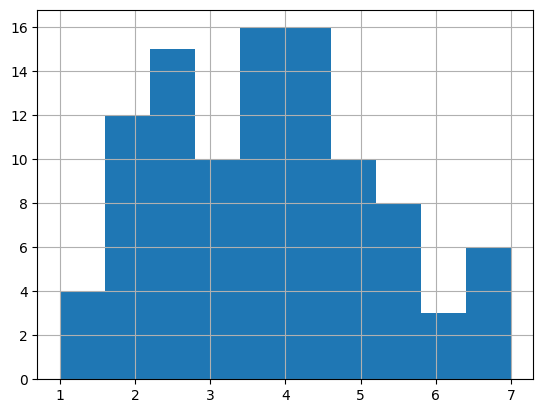

In [33]:
df['M1'].hist()
plt.show()

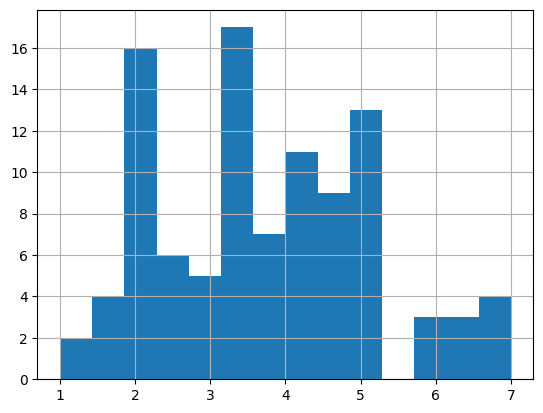

In [34]:
df['M1'].hist(bins=14)
plt.show()

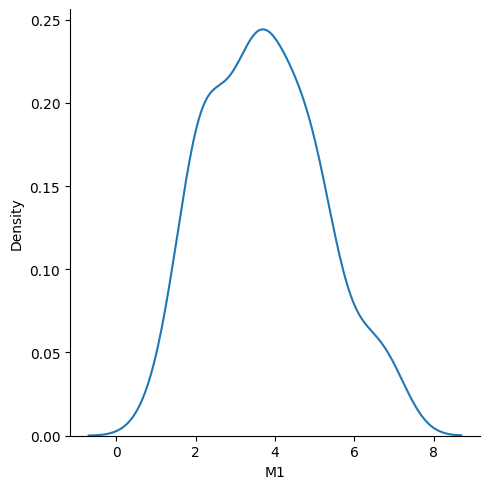

In [35]:
sns.displot(df, x='M1', kind='kde')
plt.show()

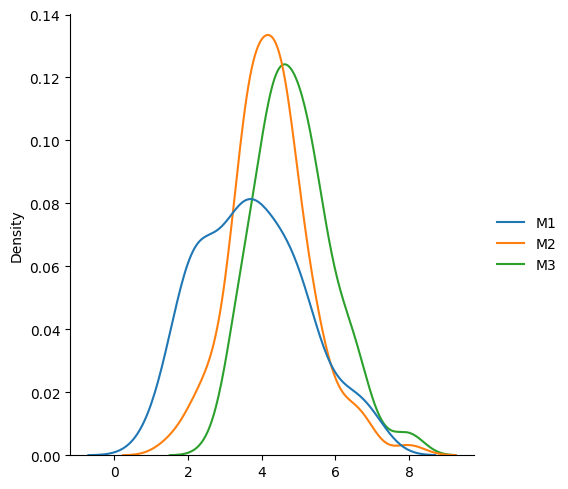

In [36]:
sns.displot(data = df[['M1','M2','M3']], kind='kde')
plt.show()

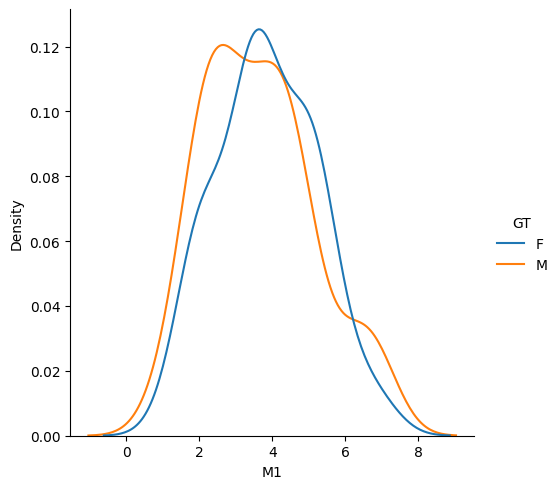

In [37]:
sns.displot(df, x='M1', hue='GT', kind='kde')
plt.show()

In [38]:
df['M1'].skew()

0.33322084231625376

In [39]:
df[['M1','M2','M3']].skew()

M1    0.333221
M2    0.472551
M3    0.607063
dtype: float64

In [40]:
df[['M1']].kurtosis()

M1   -0.517004
dtype: float64

In [41]:
df[['M1','M2','M3']].kurtosis()

M1   -0.517004
M2    1.372439
M3    0.442173
dtype: float64

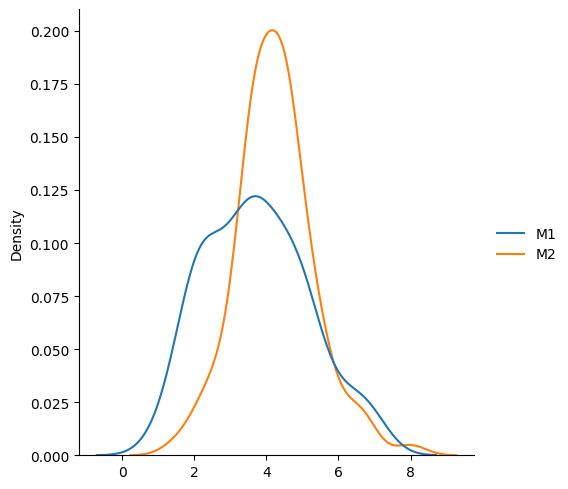

In [42]:
sns.displot(data = df[['M1','M2']], kind='kde')
plt.show()

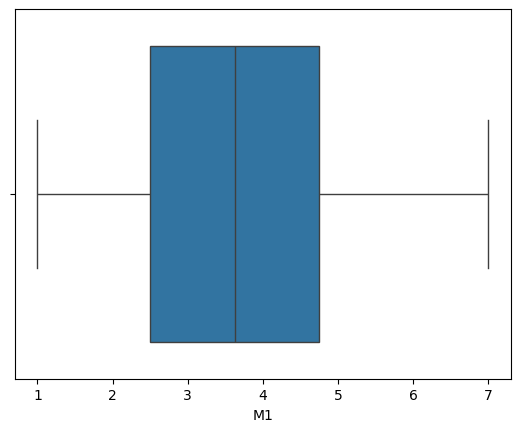

In [43]:
sns.boxplot(data=df['M1'], orient="h")
plt.show()

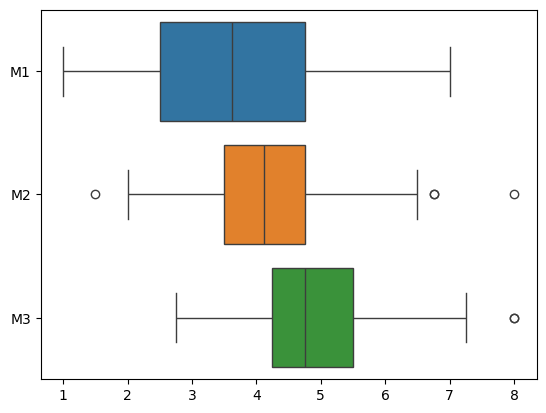

In [44]:
sns.boxplot(data=df[['M1','M2','M3']], orient='h')
plt.show()

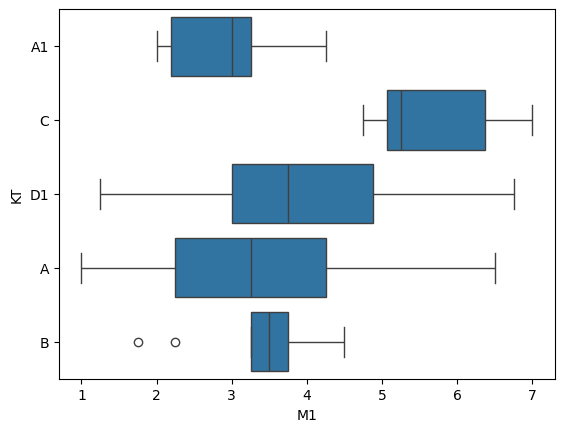

In [45]:
sns.boxplot(x='M1', y='KT',data=df, orient='h')
plt.show()

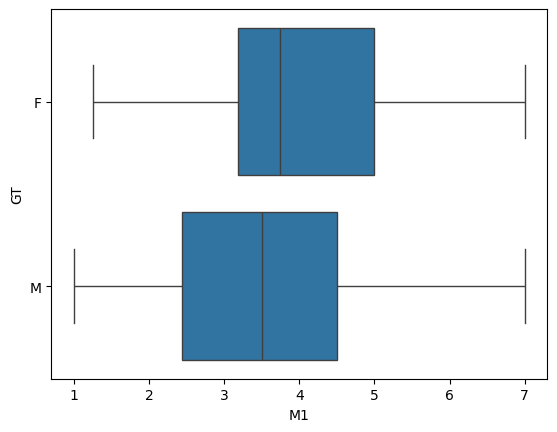

In [46]:
sns.boxplot(x='M1', y='GT',data=df, orient='h')
plt.show()

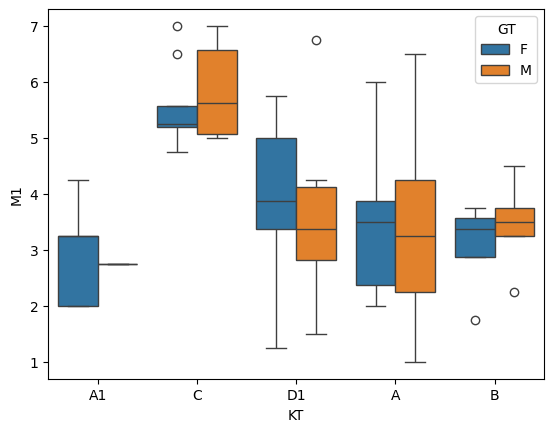

In [47]:
sns.boxplot(x='KT', y='M1',hue='GT',data=df)
plt.show()

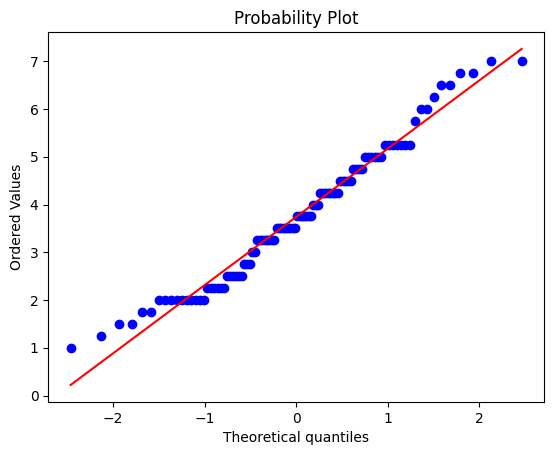

In [49]:
stats.probplot(df['M1'],plot=sns.mpl.pyplot)
plt.show()

In [50]:
df[['M1','M2']].cov()

,M1,M2
M1,2.028939,0.053081
M2,0.053081,1.123712


In [51]:
df[['M1','M2']].corr()

,M1,M2
M1,1.000000,0.035154
M2,0.035154,1.000000


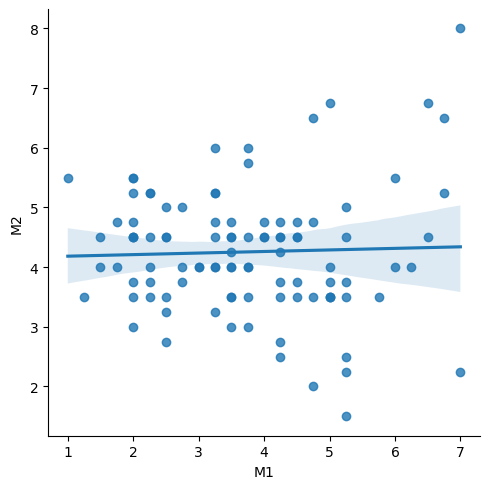

In [52]:
sns.lmplot(data=df, x='M1', y='M2', fit_reg=True)
plt.show()

In [53]:
df[['M1','M2','M3']].corr()

,M1,M2,M3
M1,1.000000,0.035154,0.018731
M2,0.035154,1.000000,-0.091523
M3,0.018731,-0.091523,1.000000


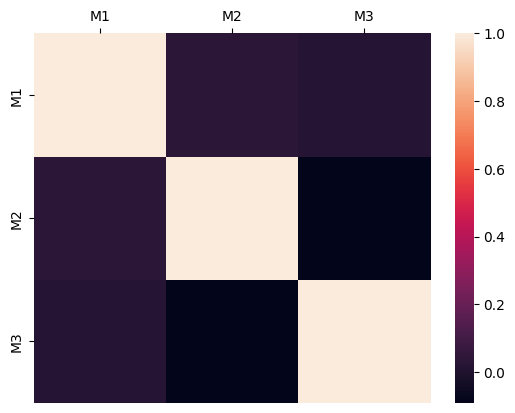

In [54]:
sns.heatmap(df[['M1','M2','M3']].corr(), vmax=1.0, square=False).xaxis.tick_top()

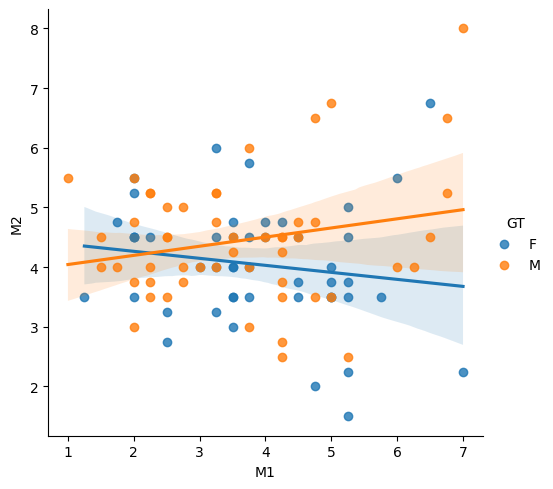

In [55]:
sns.lmplot(data=df, x='M1', y='M2',hue='GT', fit_reg=True)
plt.show()

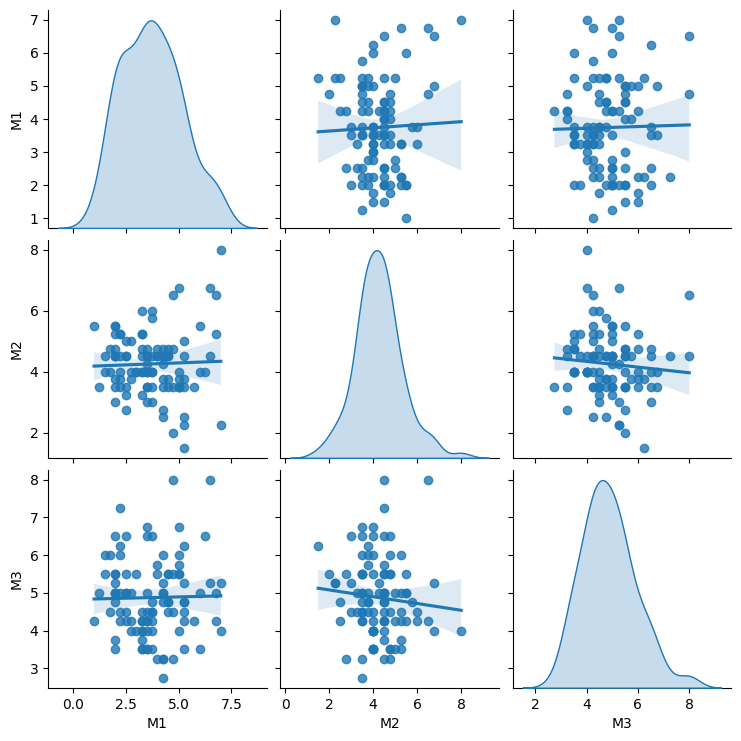

In [56]:
sns.pairplot(df[['M1','M2','M3']],diag_kind='kde', kind='reg')
plt.show()